In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.drop(['date'],axis=1,inplace=True)

In [6]:
df.drop(['id'],axis=1,inplace=True)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
pd.value_counts(df['floors']).to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [9]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


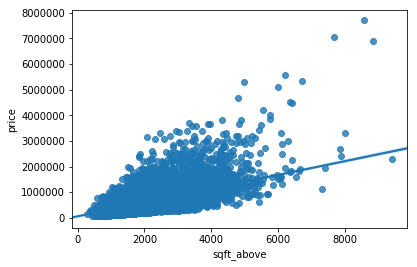

In [10]:
sns.regplot(x='sqft_above',y='price',data=df)

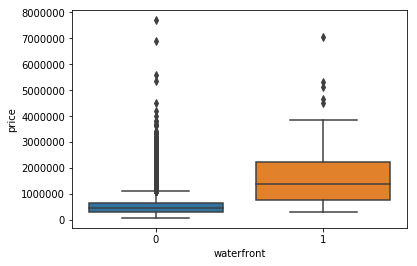

In [11]:
sns.boxplot(x='waterfront',y='price',data=df)

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

In [13]:
x=np.array(df['sqft_living']).reshape(-1,1)
y=np.array(df['price']).reshape(-1,1)
z=df[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']]

In [14]:
df = np.array(df).reshape(-1, 1)
lr.fit(x,y)
result=lr.predict(x)

In [15]:
print(result)

[[287555.06702451]
 [677621.82640197]
 [172499.40418656]
 ...
 [242655.29616092]
 [405416.96554144]
 [242655.29616092]]


In [16]:
lr.score(x,y)

0.49285321790379316

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model

In [18]:
from sklearn.linear_model import Ridge

In [19]:
rm=Ridge(alpha=0.1)

In [20]:
rm.fit(x,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
res=rm.predict(x)

In [22]:
print(res)

[[287555.0670259 ]
 [677621.82640121]
 [172499.40418858]
 ...
 [242655.29616255]
 [405416.96554218]
 [242655.29616255]]


In [23]:
rm.score(x,y)

0.49285321790379316

In [24]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [25]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [26]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [27]:
pipe.fit(z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [28]:
ypipe=pipe.predict(z)

In [29]:
ypipe

array([[349633.875],
       [559232.625],
       [447660.875],
       ...,
       [418930.875],
       [459673.125],
       [418877.875]])

In [30]:
pipe.score(z,y)

0.7513466839642997

In [31]:
lr.fit(z,y)
ylr=lr.predict(z)
ylr

array([[283413.0766304 ],
       [662377.84349011],
       [305956.87442555],
       ...,
       [304309.00758747],
       [428626.84540507],
       [304107.09789878]])

In [32]:
lr.score(z,y)

0.6577151058279326

In [33]:
prt=pr.fit_transform(z,y)

In [34]:
prt

array([[1.00000000e+00, 3.00000000e+00, 1.00000000e+00, ...,
        2.25731413e+03, 6.36650080e+04, 1.79560000e+06],
       [1.00000000e+00, 3.00000000e+00, 2.25000000e+00, ...,
        2.27729384e+03, 8.06484900e+04, 2.85610000e+06],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        2.27890710e+03, 1.29847088e+05, 7.39840000e+06],
       ...,
       [1.00000000e+00, 2.00000000e+00, 7.50000000e-01, ...,
        2.26522691e+03, 4.85462880e+04, 1.04040000e+06],
       [1.00000000e+00, 3.00000000e+00, 2.50000000e+00, ...,
        2.25952869e+03, 6.70236450e+04, 1.98810000e+06],
       [1.00000000e+00, 2.00000000e+00, 7.50000000e-01, ...,
        2.26519835e+03, 4.85459820e+04, 1.04040000e+06]])

In [35]:
lr.fit(prt,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lr.predict(prt)

array([[349612.00776005],
       [559214.97265339],
       [447635.80843067],
       ...,
       [418849.13951397],
       [459692.75053692],
       [418797.38549709]])

In [37]:
lr.score(prt,y)

0.751346765630779

In [38]:
rm.fit(prt,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
rm.predict(prt)

array([[306470.04522012],
       [606523.82817704],
       [512325.43587349],
       ...,
       [401511.94778579],
       [425357.4241972 ],
       [401400.84875873]])

In [40]:
rm.score(prt,y)

0.7393765330282036